# Selected features
We will go over all of the features in the dataset that we've selected by now.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/df_encoded_with_interest_rate.csv')
df.head(1)

/var/folders/41/hgg8f6_j1dj4y4mt0w22d8ym0000gn/T/ipykernel_48442/3545915196.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/df_encoded_with_interest_rate.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Default,NAICS_i,isNewBusiness,isFranchise,SBARatio,InterestRate
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,P I F,$0.00,60000.0,48000.0,0,45,1.0,0,0.8,5.19


In [4]:
df_filtered = df[df['ApprovalFY'] != '1976A']
df_filtered['ApprovalFY'] = df_filtered['ApprovalFY'].astype(int)


/var/folders/41/hgg8f6_j1dj4y4mt0w22d8ym0000gn/T/ipykernel_48442/2045843897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ApprovalFY'] = df_filtered['ApprovalFY'].astype(int)


In [5]:
df = df_filtered

In [6]:
# I'm gonna drop a bumch of columns that I don't care about for now. I will leave the feature "name" for traceability.
drop_columns = ['LoanNr_ChkDgt', 'City', 'State', 'Zip', 'BankState', 'ApprovalDate',
                'CreateJob', 'RetainedJob', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
                'BalanceGross', 'ChgOffPrinGr']
df.drop(drop_columns, inplace=True, axis=1)
df.head(1)

,Name,Bank,NAICS,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Default,NAICS_i,isNewBusiness,isFranchise,SBARatio,InterestRate
0,ABC HOBBYCRAFT,FIFTH THIRD BANK,451120,1997,84,4,2.0,1,0,0,1,P I F,60000.0,48000.0,0,45,1.0,0,0.8,5.19


In [7]:
# Drop data with null MIS_Status, as it is useless
df.dropna(subset=['MIS_Status'], inplace=True)
df['MIS_Status'].describe()

count     870496
unique         2
top        P I F
freq      721252
Name: MIS_Status, dtype: object

In [8]:
# Encode the target variable to binary values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['PaidInFull'] = label_encoder.fit_transform(df['MIS_Status'])
df.drop(['MIS_Status'], inplace=True, axis=1)
print(df['PaidInFull'].describe())
# Paid in Full is encoded as 1

count    870496.000000
mean          0.828553
std           0.376899
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: PaidInFull, dtype: float64


In [9]:
print(f'Our ratio of target variable is {df["PaidInFull"].mean()} ')

Our ratio of target variable is 0.8285529169576885 


In [10]:
# Helper function to draw histograms
def draw_histogram(column: pd.DataFrame, name: str, nbins: int = 50, log=False):
    plt.figure(figsize=(8, 6))
    plt.hist(column, bins=nbins, alpha=0.7, color='skyblue', edgecolor='black', log=log)
    plt.title(f'Histogram of {name}')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Direct Inclusion

Can be directly included or with minimum manipulation.

## Engineered Features

### Interest Rate

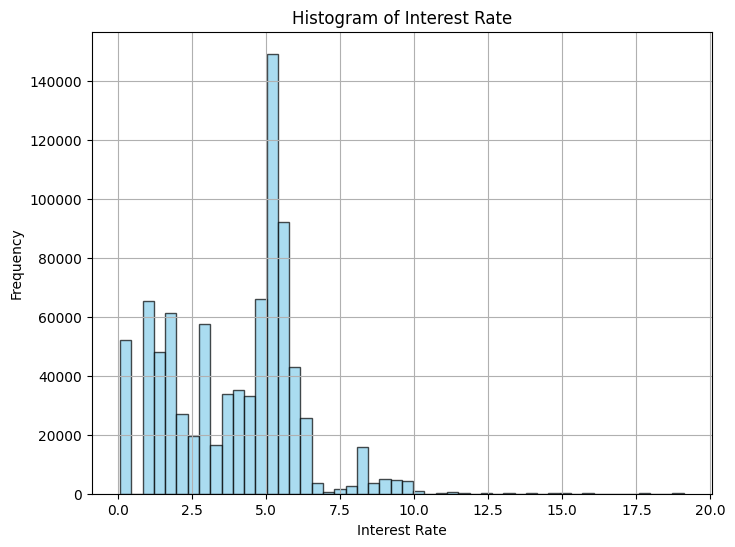

In [10]:
draw_histogram(df['InterestRate'], 'Interest Rate')
# Most are located in round numbers, like 50%, 75%, 80% etc.

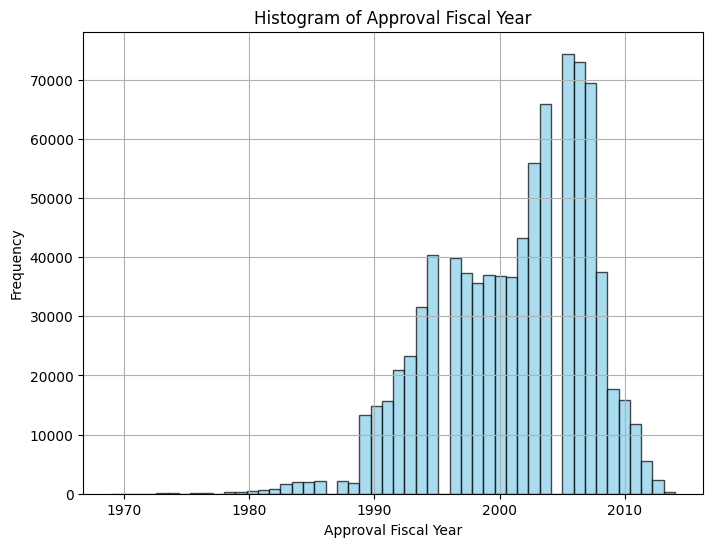

In [11]:
draw_histogram(df['ApprovalFY'], 'Approval Fiscal Year')

## Test

## Correlation study

In [12]:
df.columns

Index(['Name', 'Bank', 'NAICS', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'GrAppv',
       'SBA_Appv', 'Default', 'NAICS_i', 'isNewBusiness', 'isFranchise',
       'SBARatio', 'InterestRate', 'PaidInFull'],
      dtype='object')

In [24]:
target = 'PaidInFull'
features = [feature for feature in df.columns if feature not in target]
num_features = ['Term', 'NoEmp', 'GrAppv', 'SBA_Appv', 'SBARatio', 'NAICS_i', 'isFranchise', 'InterestRate', 'ApprovalFY']
cat_features = [feature for feature in features if feature not in num_features]

print(f"Cathegorical features: {cat_features}")
print(f"Numeric features: {num_features}")

Cathegorical features: ['Name', 'Bank', 'NAICS', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Default', 'isNewBusiness']
Numeric features: ['Term', 'NoEmp', 'GrAppv', 'SBA_Appv', 'SBARatio', 'NAICS_i', 'isFranchise', 'InterestRate', 'ApprovalFY']


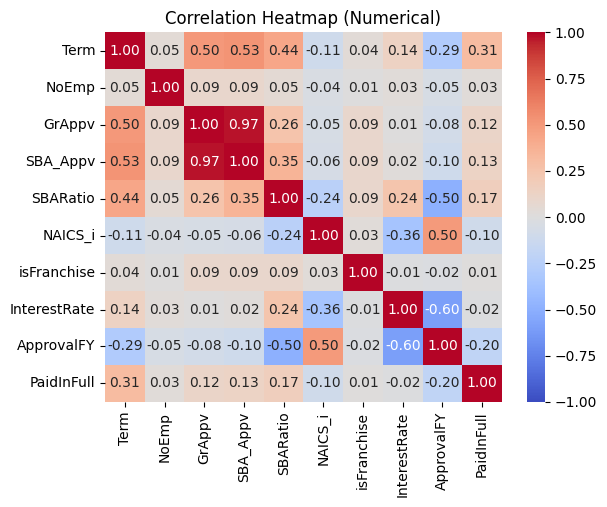

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
numeric_corr = df[num_features + [target]].corr()

# Generate heatmap
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numerical)')
plt.show()
# The correlation between the number of employees and the target seems to be minimal.

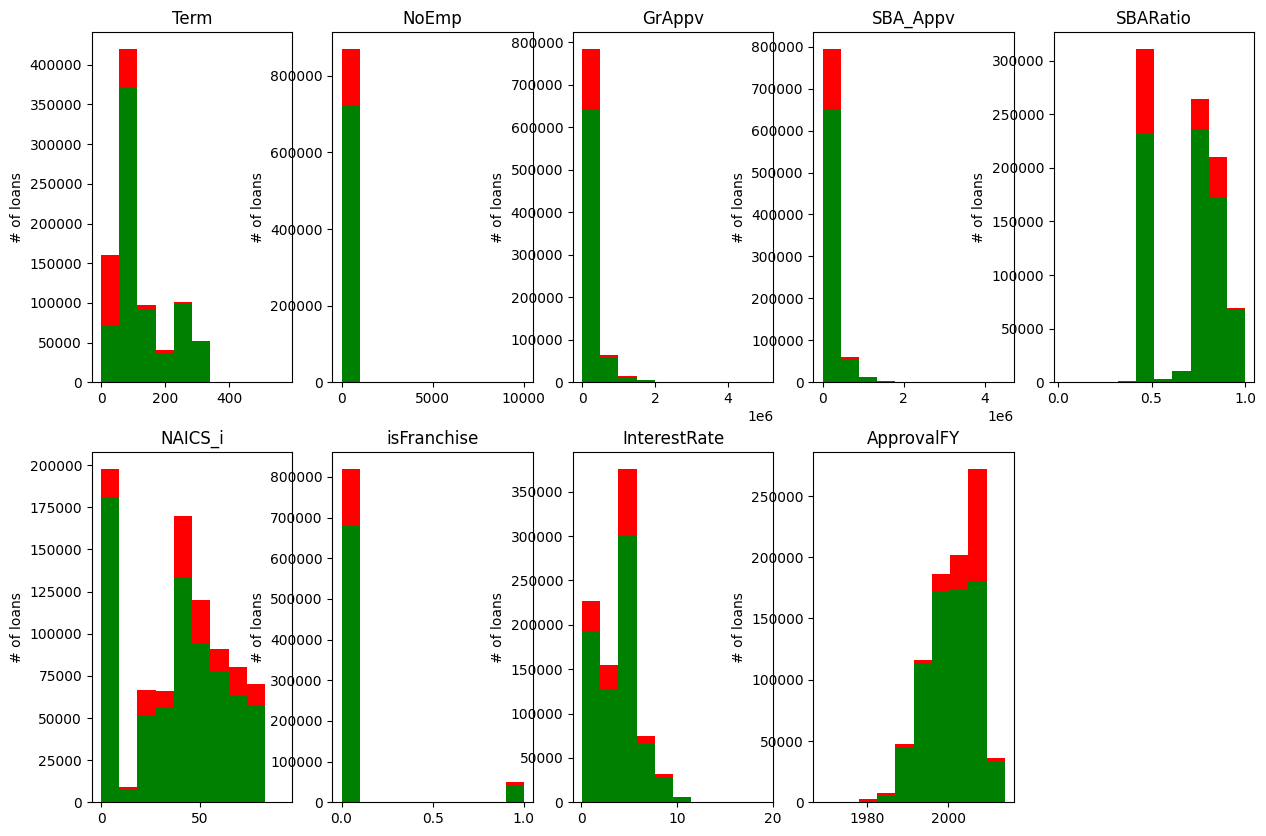

In [27]:
import matplotlib.pyplot as plt
i = 251
plt.figure(figsize=(15, 10))
for num_feature in num_features:
    plt.subplot(i)
    plt.hist(x = [df[df[target]==1][num_feature], df[df[target]==0][num_feature]], 
            stacked=True, color = ['g','r'])
    plt.title(num_feature)
    plt.ylabel('# of loans')
    i += 1


# plt.subplot(235)
# plt.hist(x = [df[df[target]==1]['NoEmp'], df[df[target]==0]['NoEmp']], 
#          stacked=True, color = ['g','r'])
# plt.title('NoEmp')
# plt.xlabel('NoEmp')
# plt.ylabel('# of loans')

# plt.subplot(236)
# plt.hist(x = [df[df[target]==1]['SBARatio'], df[df[target]==0]['SBARatio']], 
#          stacked=True, color = ['g','r'])
# plt.title('SBARatio')
# plt.xlabel('SBARatio')
# plt.ylabel('# of loans')


## Crosstab analysis

In [16]:

NAICS_not_zero = df[df['NAICS_i'] != 0]
NAICS_not_zero_ratio = len(NAICS_not_zero[NAICS_not_zero[target] == 1])/len(NAICS_not_zero)
whole_ratio = len(df[df[target] == 1])/len(df)
print(whole_ratio)
print(NAICS_not_zero_ratio)
cross_tab = pd.crosstab(df['NAICS_i'], df[target])
cross_tab['Ratio'] = cross_tab[1] / cross_tab.sum(axis=1)
print(cross_tab)

0.8285529169576885
0.8029224311678429
PaidInFull      0       1     Ratio
NAICS_i                            
0           16651  181049  0.915776
11            792    8033  0.910255
21            150    1658  0.917035
22             88     554  0.862928
23          14523   49366  0.772684
31           2157    9243  0.810789
32           2798   14591  0.839094
33           4906   32091  0.867395
42           8766   38094  0.812932
44          18039   64027  0.780189
45           9367   31584  0.771263
48           5078   14344  0.738544
49            471    1649  0.777830
51           2652    8292  0.757675
52           2520    6597  0.723593
53           3677    9445  0.719784
54          11997   53276  0.816203
55             25     229  0.901575
56           6985   24085  0.775185
61           1455    4698  0.763530
62           5445   48351  0.898784
71           2875   11302  0.797207
72          14339   51624  0.782621
81          13454   56885  0.808726
92             34     185 

In [17]:
cross_tab = pd.crosstab(df['NewExist'], df[target])
cross_tab['Ratio'] = cross_tab[1] / cross_tab.sum(axis=1)

cross_tab

PaidInFull,0,1,Ratio
NewExist,,,
1.0,104095,520658,0.833382
2.0,45149,200594,0.816276


In [18]:
cross_tab = pd.crosstab(df['UrbanRural'], df[target])
cross_tab['Ratio'] = cross_tab[1] / cross_tab.sum(axis=1)

cross_tab

PaidInFull,0,1,Ratio
UrbanRural,,,
0,22616,292874,0.928315
1,107724,345154,0.762135
2,18904,83224,0.814899


In [19]:
cross_tab = pd.crosstab(df['RevLineCr'], df[target])
cross_tab['Ratio'] = cross_tab[1] / cross_tab.sum(axis=1)

cross_tab

PaidInFull,0,1,Ratio
RevLineCr,,,
0,98492,572340,0.853179
1,50752,148912,0.745813


In [20]:
cross_tab = pd.crosstab(df['LowDoc'], df[target])
cross_tab['Ratio'] = cross_tab[1] / cross_tab.sum(axis=1)

cross_tab

PaidInFull,0,1,Ratio
LowDoc,,,
0,139401,623230,0.817210
1,9843,98022,0.908747


In [21]:
cross_tab = pd.crosstab(df['isFranchise'], df[target])
cross_tab['Ratio'] = cross_tab[1] / cross_tab.sum(axis=1)

cross_tab

PaidInFull,0,1,Ratio
isFranchise,,,
0,141521,678124,0.827339
1,7723,43128,0.848125


In [22]:
cross_tab = pd.crosstab(df['FranchiseCode'], df[target])
cross_tab['Ratio'] = cross_tab[1] / cross_tab.sum(axis=1)

cross_tab = cross_tab.sort_values(by=0, ascending=False)
cross_tab.head(20)

PaidInFull,0,1,Ratio
FranchiseCode,,,
1,74996,545927,0.879219
0,66525,132197,0.665236
68020,486,1418,0.744748
17998,194,404,0.675585
52000,181,393,0.684669
78760,153,3166,0.953902
65140,98,95,0.492228
50564,93,925,0.908644
10528,85,338,0.799054


In [23]:
df[df['FranchiseCode_i'] == 34845].head(5)

KeyError: 'FranchiseCode_i'

In [ ]:
cross_tab = pd.crosstab(df['Bank'], df[target])
cross_tab['Ratio'] = cross_tab[1] / cross_tab.sum(axis=1)

cross_tab = cross_tab.sort_values(by=0, ascending=False)
cross_tab.head(20)

## Density study of numerical vars

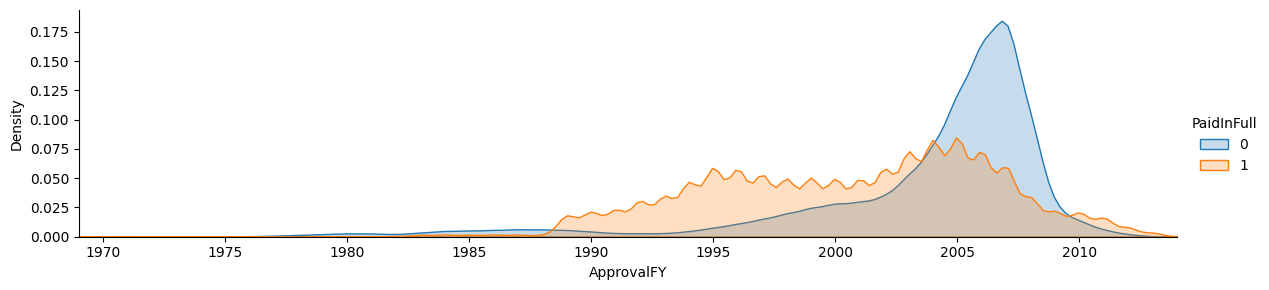

In [29]:
a = sns.FacetGrid( df, hue = target, aspect=4 )
a.map(sns.kdeplot, 'ApprovalFY', fill= True )
a.set(xlim=(df['ApprovalFY'].min() , df['ApprovalFY'].max()))
a.add_legend()

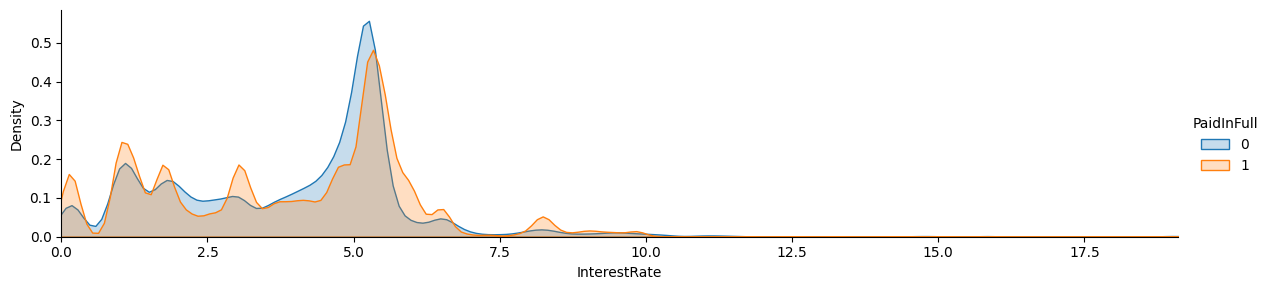

In [30]:
a = sns.FacetGrid( df, hue = target, aspect=4 )
a.map(sns.kdeplot, 'InterestRate', fill= True )
a.set(xlim=(0 , df['InterestRate'].max()))
a.add_legend()

In [ ]:
a = sns.FacetGrid( df, hue = target, aspect=4 )
a.map(sns.kdeplot, 'Term', fill= True )
a.set(xlim=(0 , df['Term'].max()))
a.add_legend()

In [ ]:
a = sns.FacetGrid( df, hue = target, aspect=4 )
a.map(sns.kdeplot, 'NoEmp', fill= True )
a.set(xlim=(0 , 100))
a.add_legend()

In [ ]:
a = sns.FacetGrid( df, hue = target, aspect=4 )
a.map(sns.kdeplot, 'GrAppv', fill= True )
a.set(xlim=(0, 100000))
a.add_legend()

In [ ]:
a = sns.FacetGrid( df, hue = target, aspect=4 )
a.map(sns.kdeplot, 'SBA_Appv', fill= True )
a.set(xlim=(0, 100000))
a.add_legend()

In [ ]:
a = sns.FacetGrid( df, hue = target, aspect=4 )
a.map(sns.kdeplot, 'SBARatio', fill= True )
a.set(xlim=(0, df['SBARatio'].max()))
a.add_legend()

In [ ]:
a = sns.FacetGrid( df, hue = target, aspect=4 )
a.map(sns.kdeplot, 'NAICS_i', fill= True )
a.set(xlim=(0, df['NAICS_i'].max()))
a.add_legend()

In [ ]:
a = sns.FacetGrid( df, hue = target, aspect=4)
a.map(sns.kdeplot, 'FranchiseCode_i', fill= True)
a.set(xlim=(0, df['FranchiseCode_i'].max()))
a.add_legend()